## Day 47 Lecture 1 Assignment

In this assignment, we will apply k-means clustering to a dataset containing player-season statistics for NBA players from the past four years.

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

This dataset contains player-season statistics for NBA players from the past four years. Each row in this dataset represents a player's per-game averages for a single season. 

This dataset contains the following variables:

- Seas: season ('2019' = 2018-2019 season, '2018' = 2017-2018 season, etc.)
- Player: player name
- Pos: position
- Age: age
- Tm: team
- G: games played
- GS: games started
- MP: minutes played
- FG: field goals
- FGA: field goals attempted
- FG%: field goal percentage
- 3P: 3 pointers
- 3PA: 3 pointers attempted
- 3P%: 3 point percentage
- 2P: 2 pointers
- 2PA: 2 pointers attempted
- 2P%: 2 point percentage
- eFG%: effective field goal percentage
- FT: free throws
- FTA: free throws attempted
- FT%: free throw percentage
- ORB: offensive rebound
- DRB: defensive rebound
- TRB: total rebounds
- AST: assists
- STL: steals
- BLK: blocks
- TOV: turnovers
- PF: personal fouls
- PTS: points

Load the dataset.

In [3]:
# answer goes here
url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv'

nba_df = pd.read_csv(url)

nba_df.shape

(2141, 30)

The goal is to cluster these player-seasons to identify potential player "archetypes".

Begin by removing players whose season did not meet one of the following criteria:
1. Started at least 20 games
2. Averaged at least 10 minutes per game

In [4]:
# answer goes here
nba_df = nba_df.loc[(nba_df['GS']>=20)&(nba_df['MP']>=10)]

nba_df.shape

(804, 30)

Choose a subset of numeric columns that is interesting to you from an "archetypal" standpoint. 

We will choose the following basic statistics: **points, total rebounds, assists, steals, blocks**, and **turnovers**, but you should feel free to choose other reasonable feature sets if you like. Be careful not to include too many dimensions (curse of dimensionality).

In [5]:
# answer goes here
archetypes = nba_df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']].copy()

In [6]:
archetypes.describe()

,PTS,TRB,AST,STL,BLK,TOV
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,13.233209,5.297139,2.891915,0.920896,0.591915,1.680597
std,5.820125,2.607386,2.092404,0.415918,0.495556,0.825796
min,2.900000,1.400000,0.200000,0.100000,0.000000,0.300000
25%,8.800000,3.300000,1.400000,0.600000,0.200000,1.100000
50%,12.500000,4.700000,2.100000,0.800000,0.400000,1.500000
75%,16.500000,6.700000,4.000000,1.100000,0.800000,2.200000
max,36.100000,16.000000,11.700000,2.400000,3.700000,5.700000


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [7]:
# answer goes here
scaler = StandardScaler()

archetypes_std = pd.DataFrame(scaler.fit_transform(archetypes), columns=archetypes.columns)

pca = PCA(n_components=2)
archetypes_pca = pca.fit_transform(archetypes_std)

Run K-means clustering with K = 3 and print out the resulting centroids. When printing the centroids, transform the scaled centroids back into their corresponding unscaled values. What "archetypes" do you see?

In [8]:
# answer goes here
km_3 =KMeans(n_clusters=3)
pred_3 = km_3.fit_predict(archetypes_std)
cluster_centers_std = pd.DataFrame(km_3.cluster_centers_, columns=archetypes.columns).add_suffix('_std').rename_axis('Archtype')
cluster_centers_std

,PTS_std,TRB_std,AST_std,STL_std,BLK_std,TOV_std
Archtype,,,,,,
0,0.086332,1.269641,-0.467217,-0.345349,1.289195,-0.014648
1,1.075975,-0.001260,1.454813,1.042428,-0.213796,1.353680
2,-0.468976,-0.517071,-0.396048,-0.279474,-0.439358,-0.539769


In [9]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(cluster_centers_std), columns=archetypes.columns).rename_axis('Archtype')
cluster_centers['Count'] = pd.Series(pred_3).value_counts()
cluster_centers.style.background_gradient()

,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
0,13.735359,8.605525,1.914917,0.777348,1.230387,1.668508,181
1,19.491620,5.293855,5.934078,1.354190,0.486034,2.797765,179
2,10.505405,3.949775,2.063739,0.804730,0.374324,1.235135,444


In [10]:
pca_centers = pca.transform(cluster_centers_std)

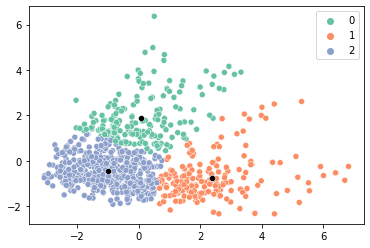

In [11]:
sns.scatterplot(x=archetypes_pca[:,0], y=archetypes_pca[:,1], hue=pred_3, palette='Set2')
sns.scatterplot(x=pca_centers[:,0], y=pca_centers[:,1], color='black')
plt.legend()
plt.show()

From the data we can infer:

>Cluster 2 are point scorers. 

>Cluster 0 are defensive players.

>Cluster 1 are overall average players. This is the most dense cluster.

Experiment with different values of K. Do any further interesting archetypes come out?

2 Clusters


,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
0,19.459906,6.056132,5.474057,1.323113,0.642453,2.734434,212
1,11.003378,5.025338,1.967230,0.776858,0.573818,1.303209,592


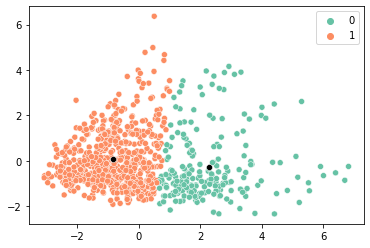



3 Clusters


,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
0,10.505405,3.949775,2.063739,0.804730,0.374324,1.235135,444
1,19.491620,5.293855,5.934078,1.354190,0.486034,2.797765,179
2,13.735359,8.605525,1.914917,0.777348,1.230387,1.668508,181


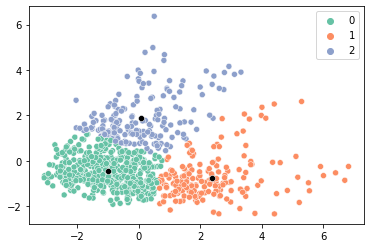



4 Clusters


,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
0,8.298893,4.282288,1.390037,0.630996,0.482657,0.975646,271
1,20.188889,5.561806,6.289583,1.404167,0.506944,2.952083,144
2,14.960000,9.123704,2.071852,0.773333,1.361481,1.820000,135
3,13.636614,4.196063,3.003937,1.034646,0.347638,1.637795,254


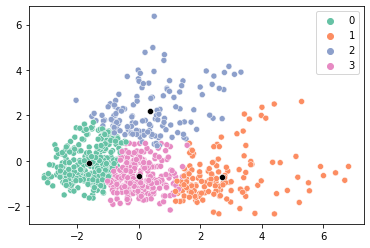



5 Clusters


,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
0,11.485185,7.238272,1.660494,0.683951,0.926543,1.383333,162
1,7.755155,3.478351,1.409794,0.608247,0.356186,0.906701,194
2,19.707639,5.226389,6.286806,1.395833,0.454861,2.878472,144
3,18.730303,10.577273,2.603030,0.972727,1.692424,2.315152,66
4,13.446639,4.036975,2.964286,1.035294,0.334034,1.613025,238


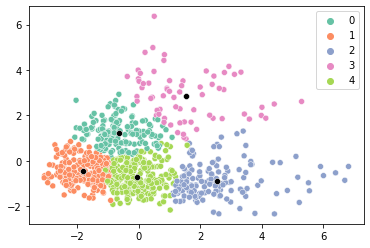



6 Clusters


,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
0,11.466875,7.222500,1.666875,0.679375,0.919375,1.381250,160
1,17.691803,10.457377,2.331148,0.931148,1.731148,2.132787,61
2,13.302203,4.037445,2.863436,1.028194,0.333480,1.582819,227
3,7.734715,3.478756,1.405181,0.607254,0.355440,0.905699,193
4,24.603226,8.374194,7.803226,1.603226,0.809677,3.941935,31
5,18.564394,4.681061,5.705303,1.322727,0.407576,2.604545,132


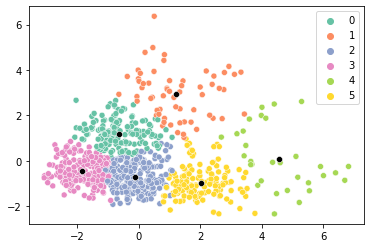



7 Clusters


,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
0,7.536111,3.498333,1.373333,0.593889,0.355556,0.885556,180
1,11.467763,7.255921,1.666447,0.659868,0.934211,1.387500,152
2,14.282143,3.709524,3.152976,0.838095,0.276786,1.710119,168
3,24.603226,8.374194,7.803226,1.603226,0.809677,3.941935,31
4,18.556452,4.720161,5.804032,1.336290,0.402419,2.630645,124
5,17.755000,10.473333,2.343333,0.921667,1.743333,2.140000,60
6,11.365169,4.829213,2.165169,1.367416,0.492135,1.312360,89


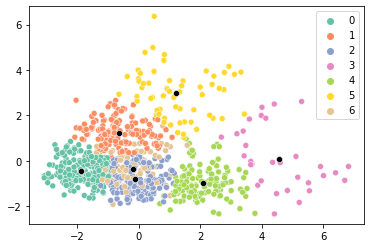



8 Clusters


,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
0,13.514286,3.647024,3.017262,0.829167,0.270238,1.637500,168
1,22.038462,4.874359,4.953846,1.156410,0.403846,2.600000,78
2,17.735088,10.585965,2.250877,0.926316,1.778947,2.140351,57
3,24.300000,8.022857,7.545714,1.645714,0.791429,3.857143,35
4,11.631973,7.363265,1.712245,0.655782,0.944218,1.410204,147
5,7.396552,3.532759,1.314943,0.590805,0.368966,0.864368,174
6,11.447619,5.004762,2.017857,1.365476,0.509524,1.275000,84
7,13.609836,4.332787,6.383607,1.419672,0.395082,2.483607,61


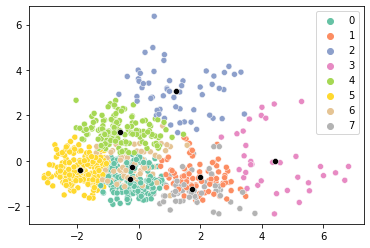



9 Clusters


,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
0,7.600568,3.513068,1.334091,0.593182,0.352841,0.877273,176
1,18.541176,4.599160,5.787395,1.365546,0.392437,2.630252,119
2,15.988785,6.546729,2.312150,0.836449,0.513084,1.702804,107
3,24.291304,10.256522,4.339130,1.208696,1.639130,3.121739,23
4,12.687402,3.107087,3.562992,0.862205,0.216535,1.679528,127
5,10.151376,6.891743,1.481651,0.608257,1.062385,1.283486,109
6,24.504545,7.209091,8.968182,1.631818,0.590909,4.140909,22
7,15.855102,10.608163,1.879592,0.877551,1.673469,1.922449,49
8,11.001389,4.620833,2.097222,1.409722,0.502778,1.268056,72


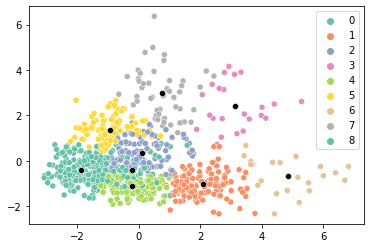



10 Clusters


,PTS,TRB,AST,STL,BLK,TOV,Count
Archtype,,,,,,,
0,7.419512,3.438415,1.299390,0.589024,0.344512,0.859146,164
1,21.860606,10.881818,3.669697,1.248485,1.596970,2.824242,33
2,13.317544,4.314035,6.617544,1.343860,0.377193,2.542105,57
3,11.647368,4.663158,2.131579,1.398684,0.484211,1.307895,76
4,9.332039,6.636893,1.375728,0.639806,0.942718,1.211650,103
5,24.360000,7.355000,9.185000,1.680000,0.610000,4.185000,20
6,15.817978,7.446067,2.440449,0.802247,0.659551,1.753933,89
7,13.118367,3.324490,3.195918,0.844898,0.246939,1.642857,147
8,14.656098,9.714634,1.463415,0.663415,1.821951,1.724390,41


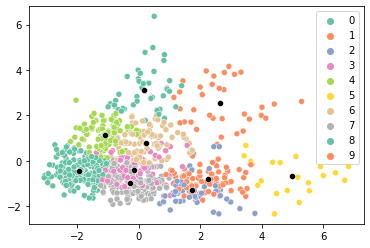

In [12]:
# answer goes here
sse = []
silhouette_coefficients = []

for n in range(2,11):
  print(f'{n} Clusters')
  km = KMeans(n_clusters=n)
  pred = km.fit_predict(archetypes_std)
  cluster_centers = pd.DataFrame(scaler.inverse_transform(km.cluster_centers_), columns=archetypes.columns).rename_axis('Archtype')
  cluster_centers['Count'] = pd.Series(pred).value_counts()
  display(cluster_centers.style.background_gradient())

  sse.append(km.inertia_)
  score = silhouette_score(archetypes_std, km.labels_)
  silhouette_coefficients.append(score)
  
  pca_centers = pca.transform(km.cluster_centers_)
  sns.scatterplot(x=archetypes_pca[:,0], y=archetypes_pca[:,1], hue=pred, palette='Set2')
  sns.scatterplot(x=pca_centers[:,0], y=pca_centers[:,1], color='black')
  plt.legend()
  plt.show()
  print('\n')

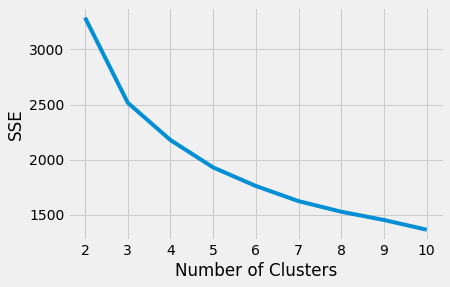

In [13]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), sse)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

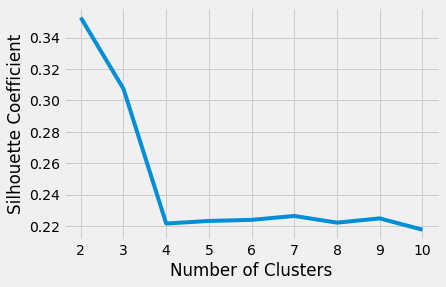

In [14]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()